## Nearest neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import os
import sklearn.neighbors as nn
# use nn.KNeighborsRegressor for numeric target

## Read in sea ice data and transform it to a wide form

In [11]:
sie = pd.read_csv('N_extent_v2.1.csv')
sie = sie.rename(columns = lambda x: x.strip())
sie.set_value(sie["extent"] < 0, "extent", np.nan)
sie.set_value(sie["area"] < 0, "area", np.nan)
print("Original data description\n", sie.describe())
#print(sie)

Original data description
               year          mo      extent        area
count   462.000000  462.000000  460.000000  460.000000
mean   1997.584416    6.487013   11.769717    9.314935
std      11.130483    3.470802    3.166745    3.207328
min    1978.000000    1.000000    3.630000    2.370000
25%    1988.000000    3.000000    9.245000    6.352500
50%    1998.000000    6.000000   12.420000   10.020000
75%    2007.000000    9.750000   14.540000   12.275000
max    2017.000000   12.000000   16.520000   13.870000


In [9]:
years = np.sort(sie["year"].unique())
print(len(years), "unique years:\n", years)
data = pd.DataFrame(np.ones(len(years)), columns=["const"], index = years)
#data
for m in range(1,13):
    md = sie["extent"][sie["mo"] == m].values
    idx = sie["year"][sie["mo"] == m].values
    data["ext" + str(m)] = pd.Series(md, index = idx)
print(data.head(3))
print(data.tail(3))   


40 unique years:
 [1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
      const   ext1   ext2   ext3   ext4   ext5   ext6   ext7  ext8  ext9  \
1978    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   
1979    1.0  15.60  16.38  16.52  15.56  14.09  12.65  10.52  8.18  7.22   
1980    1.0  15.05  16.07  16.21  15.55  14.08  12.37  10.43  8.08  7.86   

      ext10  ext11  ext12  
1978    NaN  12.06  14.13  
1979   9.43  11.19  13.58  
1980   9.49  11.72  13.75  
      const   ext1   ext2   ext3   ext4   ext5   ext6  ext7  ext8  ext9  \
2015    1.0  13.75  14.51  14.49  13.98  12.69  11.05  8.83  5.66  4.68   
2016    1.0  13.64  14.32  14.53  13.83  12.08  10.60  8.13  5.60  4.72   
2017    1.0  13.38  14.28  14.43  13.83    NaN    NaN   NaN   NaN   NaN   

      ext10  ext11  ext12  
2015   7.79  10.11  12.33  
2016

## Now predict the September SIE minimum using the March SIE maximum.
First, let's plot the data:

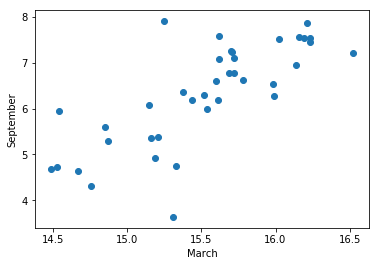

In [12]:
plt.scatter(data["ext3"], data["ext9"])
plt.xlabel("March")
plt.ylabel("September")

First create training and test data.  Use years 1979-2016 for training

In [13]:
xtr = data.loc[range(1979,2017)].as_matrix(["ext3"])
ytr = data.loc[range(1979,2017)].as_matrix(["ext9"])


Now estimate the 1-NN model for these years.  Use this model to
predict September SIE minimum (March 2017 = 14.43).  Which year SIE
minimum does this value correspond to?

In [6]:

m = nn.KNeighborsRegressor(1)
# use 1 neighbor
f = m.fit(xtr, ytr)
xx = data.loc[2017].as_matrix(["ext3"])
f.predict(np.asscalar(xx))

array([[ 4.68]])

Now play with different number of neigbors

In [8]:
## do it here


However, we have more data for 2017: January till April.  Now build a
NN model that includes all these 4 months

In [14]:
v = ["ext1", "ext2", "ext3", "ext4"]
xtr = data.loc[range(1979,2017)].as_matrix(v)
ytr = data.loc[range(1979,2017)].as_matrix(["ext9"])
# remove nan-s:
i = np.isnan(xtr).any(axis=1)
j = np.isnan(ytr).any(axis=1)
xtr = xtr[~(i | j)]
ytr = ytr[~(i | j)]
## and now do it
## note: you may have to reshape your prediction data to 2-d array
xtr


array([[ 15.6 ,  16.38,  16.52,  15.56],
       [ 15.05,  16.07,  16.21,  15.55],
       [ 15.11,  15.75,  15.7 ,  15.19],
       [ 15.34,  16.14,  16.23,  15.62],
       [ 15.16,  16.1 ,  16.19,  15.36],
       [ 14.69,  15.42,  15.72,  15.23],
       [ 14.96,  15.77,  16.14,  15.41],
       [ 15.12,  15.99,  16.16,  15.23],
       [ 15.28,  16.21,  16.02,  15.38],
       [ 15.23,  15.67,  15.62,  14.53],
       [ 15.07,  15.69,  15.99,  14.79],
       [ 14.58,  15.37,  15.6 ,  15.03],
       [ 14.86,  15.62,  15.62,  14.8 ],
       [ 15.2 ,  15.85,  15.98,  15.3 ],
       [ 14.94,  15.72,  15.71,  15.07],
       [ 14.74,  15.37,  15.44,  14.71],
       [ 14.35,  15.32,  15.25,  14.35],
       [ 14.62,  15.63,  15.69,  14.69],
       [ 14.94,  15.9 ,  15.78,  14.99],
       [ 14.57,  15.48,  15.52,  15.24],
       [ 14.54,  15.3 ,  15.38,  14.75],
       [ 14.42,  15.42,  15.72,  14.97],
       [ 14.57,  15.47,  15.54,  14.46],
       [ 14.59,  15.35,  15.61,  14.68],
       [ 14.15, 

Now let's do some cross-validation.  Use 29 random years 1979-2016 as
test training data and the rest as test data.  Compute RMSE on your
test data

In [15]:
# you may use this trainint/test split
years = np.arange(1979,2017)
np.random.shuffle(years)
yearTr = years[:28]
yearTe = years[28:]
print("training years", yearTr)
print("test years", yearTe)

training years [2009 1999 2013 2002 1987 1988 2001 1979 2005 1993 2012 1995 1983 2007 1994
 1982 2010 2003 1998 2006 2011 1991 1992 1981 2016 2008 2015 1986]
test years [1989 1985 1990 1984 2004 2000 2014 1980 1996 1997]


In [17]:
v = ["ext1", "ext2", "ext3", "ext4"]
xtr = data.loc[yearTr].as_matrix(v)
ytr = data.loc[yearTr].as_matrix(["ext9"])
# note: your test data will be data.loc[yearTe]. ...
# remove nan-s:
i = np.isnan(xtr).any(axis=1)
j = np.isnan(ytr).any(axis=1)
xtr = xtr[~(i | j)]
ytr = ytr[~(i | j)]
## and now do it
data

,const,ext1,ext2,ext3,ext4,ext5,ext6,ext7,ext8,ext9,ext10,ext11,ext12
1978,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.06,14.13
1979,1.0,15.60,16.38,16.52,15.56,14.09,12.65,10.52,8.18,7.22,9.43,11.19,13.58
1980,1.0,15.05,16.07,16.21,15.55,14.08,12.37,10.43,8.08,7.86,9.49,11.72,13.75
1981,1.0,15.11,15.75,15.70,15.19,13.92,12.62,10.67,7.89,7.25,9.21,11.21,13.78
1982,1.0,15.34,16.14,16.23,15.62,14.18,12.75,10.81,8.30,7.45,10.02,11.96,13.87
1983,1.0,15.16,16.10,16.19,15.36,13.57,12.39,10.95,8.39,7.54,9.69,11.68,13.49
1984,1.0,14.69,15.42,15.72,15.23,13.70,12.25,10.22,7.94,7.11,8.87,11.32,13.21
1985,1.0,14.96,15.77,16.14,15.41,14.26,12.45,10.16,7.50,6.94,8.92,11.42,13.25
1986,1.0,15.12,15.99,16.16,15.23,13.55,12.14,10.50,8.04,7.55,9.92,11.81,13.46
1987,1.0,15.28,16.21,16.02,15.38,13.85,12.61,10.81,7.72,7.51,9.33,11.59,NaN


And finally plot true-versus predicted

In [13]:
# plt.scatter ....
